In [34]:
# Compare Kostis's lorentziator with my particle_tracer.py


from myutils import restore, get_vlsvfile_fullpath
import numpy as np
import pytools as pt
import ftest as ft
#matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

R_E = 6378137.0  # 6.371e6
run = 'EGI'
#t_0 = 1000
t_0 = 1505


#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1199_electron_nt_200_x19.0_y0.0_z0.0_BorisA.pickle")
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1199_electron_nt_200_x19.0_y0.0_z0.0.pickle")
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1300_electron_nt_3000_x13.0_y0.0_z0.0_intptime1_BorisA.pickle")   # dt = gyroperiod/100
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1300_electron_nt_3000_x13.0_y0.0_z0.0_intptime1_BorisB.pickle")   # dt = gyroperiod/100
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1300_electron_nt_3000_x13.0_y0.0_z0.0_intptime1_BorisC.pickle")   # dt = gyroperiod/100
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1300_electron_nt_3000_x13.0_y0.0_z0.0_intptime1_odeint.pickle")
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1300_electron_nt_120000_x13.0_y0.0_z0.0_intptime1_odeint.pickle")
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1300_electron_nt_120000_x13.0_y0.0_z0.0_intptime1_BorisA.pickle")
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1505_electron_nt_120000_x13.0_y0.0_z0.0_intptime1_BorisA.pickle")
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1505_electron_nt_120000_x13.0_y0.0_z0.0_intptime0_BorisA.pickle")
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1505_electron_nt_120000_x13.0_y0.0_z0.0_intptime0_odeint.pickle")
#dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1300_electron_nt_30_x13.0_y0.0_z0.0_intptime1_BorisA.pickle")
##dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1199_electron_nt_200_x11.5_y0.0_z0.0.pickle")
##dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_TEST_0_electron_nt_200_x11.5_y0.0_z0.0.pickle")
dct = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/test_convergence/BorisA/x13_n160000_t1300/f_liouville_test_EGI_1300_electron_nt_160000_x13.0_y0.0_z0.0_intptime1_BorisA_res1.02e+03.pickle")
#vlsv = ft.f('/wrk-vakka/users/horakons/carrington/data/particle_tracer/vlsv/E_0_-1_0_e-3_B_0_0_1_e-8.vlsv')
vlsv = ft.f(get_vlsvfile_fullpath('EGI', t_0))


nt = 3000 #200
dt = dct['t'][0][0][0] - dct['t'][0][0][1]#    -0.0005
t = t_0 + np.arange(nt+1) * dt
x = np.array(dct["x"])/R_E
v = np.array(dct["v"])



x_init = x[:,:,0,:]   # [8,8,3]
v_init = v[:,:,0,:]

nv = 8
# write initial conditions to a comma delimited .txt file 
f = open("/wrk-vakka/users/horakons/carrington/data/particle_tracer/input_trace_compare.txt", "w")
for i in range(nv):
    for j in range(nv):
        if (i == (nv-1)) & (j == (nv-1)):
            suffix = ""
        else:
            suffix = "\n"
        f.write("{},{},{},{},{},{}".format(x_init[i,j,0],x_init[i,j,1],x_init[i,j,2],
                                           v_init[i,j,0],v_init[i,j,1],v_init[i,j,2])+suffix)
f.close()

t_factor = 1 # ratio of cadence of output times between the two runs




Found population proton


In [35]:
# Read Lorentziator simulation data, from range of times

nv = 8 # 81
import ptrReader


start_ti = 0
end_ti = 30

xl = np.zeros([nv, nv, end_ti-start_ti+1, 3])
vl = np.zeros([nv, nv, end_ti-start_ti+1, 3])

for ti in range(start_ti, end_ti+1):
    print(ti)
    #p = ptrReader.read_ptr_file('/wrk-vakka/users/horakons/carrington/data/lorentziator/electron/EGI_1199_1198.9/population.{}.ptr'.format(str(ti).zfill(7)))
    #p = ptrReader.read_ptr_file('/wrk-vakka/users/horakons/carrington/data/lorentziator/electron/EGI_1199_1198.9_x19RE/population.{}.ptr'.format(str(ti).zfill(7)))
    #xl[:,:,ti,:] = p.pos().reshape([nv,nv,3])/R_E   # shape (nv^2, 3) -> (nv,nv,3)
    #vl[:,:,ti,:] = p.vel().reshape([nv,nv,3])   # shape (nv^2, 3) -> (nv,nv,3)
    #
    #x2,y2,z2,vx2,vy2,vz2 = ptrReader.read_ptr2_file('/wrk-vakka/users/kpapadak/tracer/test_run/population.{}.ptr2'.format(str(ti).zfill(7)))
    x2,y2,z2,vx2,vy2,vz2 = ptrReader.read_ptr2_file('/wrk-vakka/users/kpapadak/tracer/tmp/population.{}.ptr2'.format(str(ti).zfill(7)))   # x=13RE, 1.5s, t_out = 5e-2
    xl[:,:,ti,0]=x2.reshape([nv,nv])/R_E; xl[:,:,ti,1]=y2.reshape([nv,nv])/R_E; xl[:,:,ti,2]=z2.reshape([nv,nv])/R_E
    vl[:,:,ti,0]=vx2.reshape([nv,nv]); vl[:,:,ti,1]=vy2.reshape([nv,nv]); vl[:,:,ti,2]=vz2.reshape([nv,nv])
'''

dct_l_fake = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1300_electron_nt_120000_x13.0_y0.0_z0.0_intptime1_odeint.pickle")
xl = np.array(dct_l_fake["x"])/R_E
vl = np.array(dct_l_fake["v"])
'''

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


'\n\ndct_l_fake = restore("/wrk-vakka/users/horakons/carrington/data/particle_tracer/f_liouville_test_EGI_1300_electron_nt_120000_x13.0_y0.0_z0.0_intptime1_odeint.pickle")\nxl = np.array(dct_l_fake["x"])/R_E\nvl = np.array(dct_l_fake["v"])\n'

In [36]:
print(x[0,0,20*t_factor,:])
print(xl[0,0,20,:])
x.shape; xl.shape   # agree pretty well!

[ 1.29998756e+01  7.19100947e-05 -7.80470883e-03]
[ 1.30089260e+01 -1.06139606e-02 -7.19401057e-01]


(8, 8, 31, 3)

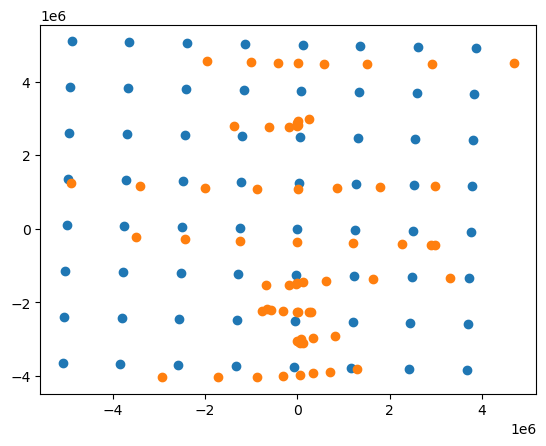

In [37]:
plt.scatter(vl[:,:,0,1], vl[:,:,0,2])   # in the magnetosheath, B~Bz, so particles mostly move in x-y plane
plt.scatter(vl[:,:,-1,1], vl[:,:,-1,2])

28-Jul-24 16:43:03: /wrk-vakka/users/horakons/tmp/ipykernel_535182/1196395514.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  t_e = 2 * np.pi / omega_e  # gyroperiod



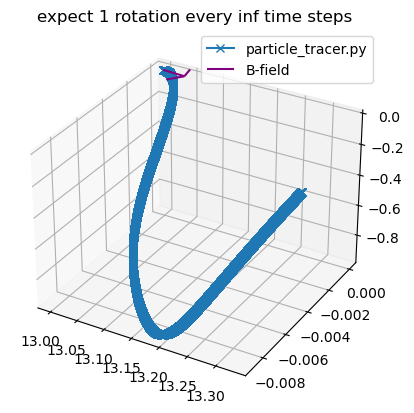

0.1

In [38]:
omega_e = (1.60217663e-19 / 9.1093837e-31 ) * np.linalg.norm(vlsv.read_interpolated_variable('vg_b_vol', x[0,0,0,:]))
t_e = 2 * np.pi / omega_e  # gyroperiod

i = 4; j = 4    # j=4 perpendicular velocity is in the proton (~ ExB drift) frame
yoffset = 0  # 1e4/R_E

fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')
inds = np.array(range(0,20000,1))
#ax.plot(x[i,j,:,0], x[i,j,:,1], x[i,j,:,2], marker = 'x', label = 'particle_tracer.py -- Boris')  # particle_tracer.py
#ax.plot(xl[i,j,:,0], xl[i,j,:,1], xl[i,j,:,2], marker = 'x', label = 'particle_tracer.py --- odeint')  # lorentziator

#ax.plot(xl[i,j,:,0], xl[i,j,:,1], xl[i,j,:,2], marker = 'x', label = 'lorentziator')  # lorentziator
#ax.plot(xl[i,j,inds,0], xl[i,j,inds,1], xl[i,j,inds,2], marker = 'x', label = 'lorentziator')  # lorentziator
#ax.plot(x[i,j,:,0], x[i,j,:,1], x[i,j,:,2], marker = 'x', label = 'particle_tracer.py')  # particle_tracer.py

ax.plot(x[i,j,inds*t_factor,0], x[i,j,inds*t_factor,1], x[i,j,inds*t_factor,2], marker = 'x', label = 'particle_tracer.py')  # particle_tracer.py
#ax.plot(x[2,4,inds*t_factor,0], x[2,4,inds*t_factor,1], x[2,4,inds*t_factor,2], marker = 'x', label = 'particle_tracer.py')  # particle_tracer.py
#ax.plot(x[6,4,inds*t_factor,0], x[6,4,inds*t_factor,1], x[6,4,inds*t_factor,2], marker = 'x', label = 'particle_tracer.py')  # particle_tracer.py


#ax.plot(xl[i,j,inds,0], xl[i,j,inds,1], xl[i,j,inds,2], marker = 'x', label = 'lorentziator')  # lorentziator

#ax.set_aspect('equal')
#ax.set_xlabel('x')
plt.title('expect 1 rotation every {} time steps'.format(t_e / np.abs(dt)))
Bvec = vlsv.read_interpolated_variable('vg_b_vol', [x[i, j,0,:]*R_E])
#Ex = vlsv.read_interpolated_variable('fg_e', [x[i, j,:]], operator = 'x')
#Ey = vlsv.read_interpolated_variable('fg_e', [x[i, j,:]], operator = 'y')
#Ez = vlsv.read_interpolated_variable('fg_e', [x[i, j,:]], operator = 'z')
B_hat = Bvec/ np.linalg.norm(Bvec)
#E_hat = np.array([Ex, Ey, Ez]) / np.linalg.norm(np.array([Ex, Ey, Ez]))
quiv_len = 1e-1
ax.quiver(x[i,j,inds[0],0], x[i,j,inds[0],1], x[i,j,inds[0],2],
          B_hat[0], B_hat[1], B_hat[2], length=quiv_len, normalize=True, color ='purple', label = 'B-field')
#ax.quiver(x[i,j,inds[0],0], x[i,j,inds[0],1], x[i,j,inds[0],2],
#          E_hat[0], E_hat[1], E_hat[2], length=quiv_len, normalize=True, color ='yellow', label = 'E-field')
plt.legend()
plt.show()
t_e
B_hat; quiv_len


In [39]:
#xl[4,4,inds,:] - x[4,4,inds,:]

In [40]:
# Lorentz factor
gamma = 1 / np.sqrt(1- (np.linalg.norm(vl, axis =-1) / 3e8)**2)
np.nanmax(gamma)

1.0002857934367835

In [41]:
#xtest = np.array([-19, 0,0]) * R_E
xtest =  x[i,j,0,:]*R_E      # i.c. @ i=4, j=4:  vpar=vperp=0
vg_v = vlsv.read_interpolated_variable('proton/vg_v', xtest)
print(vg_v)
print(vl[i, j, 0, :])
print('diff. btw e- init. vel. and proton vel.:', vg_v - vl[i, j, 0, :])   # initial delta_v wrt proton bulk flow


[-156705.42995399    5765.79601712    9824.83838652]
[-207830.73490052    -568.75335712   -5628.9789474 ]
diff. btw e- init. vel. and proton vel.: [51125.30494654  6334.54937425 15453.81733392]


In [42]:
# Does the electron drift motion for vpar=vper=0 electron match the ExB drift?
#xtest = np.array([15, 0,0]) * R_E


# Do either of these methods account for the different grid centerings of E and B?
# method 1: my fsgrid interpolation
from carrington_beta_star import interpolator_list_3d
interpolators = interpolator_list_3d(vlsv, vlsv.read_variable('fg_e'), bounds_error = False, fill_value = np.nan)
E = np.array([interpolators[0](xtest)[0], interpolators[1](xtest)[0], interpolators[2](xtest)[0]])
interpolators_B = interpolator_list_3d(vlsv, vlsv.read_variable('fg_b'), bounds_error = False, fill_value = np.nan)
B = np.array([interpolators_B[0](xtest)[0], interpolators_B[1](xtest)[0], interpolators_B[2](xtest)[0]])
#print(np.cross(E, B) / (np.linalg.norm(B))**2)

'''
# method 2: analysator's fsgrid interpolation
E = np.array([vlsv.read_interpolated_fsgrid_variable('fg_e', [xtest], operator='x')[0],
              vlsv.read_interpolated_fsgrid_variable('fg_e', [xtest], operator='y')[0],
              vlsv.read_interpolated_fsgrid_variable('fg_e', [xtest], operator='z')[0]])
B = np.array([vlsv.read_interpolated_fsgrid_variable('fg_b', [xtest], operator='x')[0],
              vlsv.read_interpolated_fsgrid_variable('fg_b', [xtest], operator='y')[0],
              vlsv.read_interpolated_fsgrid_variable('fg_b', [xtest], operator='z')[0]])
#print(np.cross(E, B) / (np.linalg.norm(B))**2) 
'''

nv = 8

v_ExB = np.cross(E, B) / (np.linalg.norm(B))**2
B_hat = B / np.linalg.norm(B)
E_hat = E / np.linalg.norm(E)
vpar_i = np.outer(np.dot(np.array(dct['v_i']), B_hat), B_hat).reshape(nv,nv,3)  # initial parallel velocity, [npar, nper, 3] array
v_ExB, vpar_i[5,4, :]
print(t_0)
print(B)
print(E)


Did not find FsGrid decomposition from vlsv file.
Calculating fsGrid decomposition from the file
Computed FsGrid decomposition to be:  [32, 16, 16]
1505
[ 2.71021541e-09  2.61420801e-10 -1.63069663e-08]
[2.11143392e-05 2.42966746e-03 7.22856876e-05]


In [10]:
print(v_ExB, vg_v)
'''
dx = x[i, j, nt-1, :] - x[i, j, 0, :]   # whole simulation delta x, particle_tracer.py 
dxl = xl[i, j, nt-1, :] - xl[i, j, 0, :] # "", Lorentziator
dx_ExB = v_ExB * nt * dt
print(dx)
print(dxl)
print(dx_ExB)
'''

[-145023.56994932    1976.43545468  -24071.21137947] [-156705.42995399    5765.79601712    9824.83838652]


'\ndx = x[i, j, nt-1, :] - x[i, j, 0, :]   # whole simulation delta x, particle_tracer.py \ndxl = xl[i, j, nt-1, :] - xl[i, j, 0, :] # "", Lorentziator\ndx_ExB = v_ExB * nt * dt\nprint(dx)\nprint(dxl)\nprint(dx_ExB)\n'

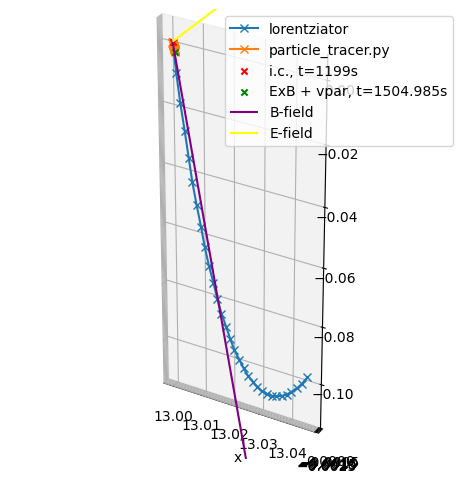

In [18]:
fig = plt.figure()
i=3; j = 3    # j=4 perpendicular velocity is in the proton (~ ExB drift) frame
ax = fig.add_subplot(111, projection = '3d')
nt_plot = 30
inds = range(0,nt_plot+1,1)
ax.plot(xl[i,j,inds,0], xl[i,j,inds,1], xl[i,j,inds,2], marker = 'x', label = 'lorentziator')  # lorentziator
ax.plot(x[i,j,inds,0], x[i,j,inds,1], x[i,j,inds,2], marker = 'x', label = 'particle_tracer.py')  # particle_tracer.py
dx_ExB_plot = v_ExB * nt_plot * dt / R_E
dx_vpar_i_plot = vpar_i[i, j, :] * nt_plot * dt / R_E
dx_plot = dx_ExB_plot + dx_vpar_i_plot
x_f = x[i,j,inds[0],:] + dx_plot
ax.scatter( x[i,j,0,0], x[i,j,0,1], x[i,j,0,2], marker = 'x', label = 'i.c., t=1199s', color = 'red')  # particle_tracer.py
ax.scatter( x_f[0], x_f[1], x_f[2], marker = 'x', label = 'ExB + vpar, t={}s'.format(t_0+nt_plot*dt), color = 'green')  # particle_tracer.py
ax.set_aspect('equal')
#ax.scatter(*points.T[0], color = 'red')
ax.set_xlabel('x')
#plt.title(r'i.c. {}, t= {}, $x = [11.5, 0, 0] R_E$, $v_\parallel=v_\perp = 0$ '.format(run, t_0))
#plt.title('expect 1 rotation every {} time steps'.format(t_e / np.abs(dt)))
quiv_len = 2e-1
ax.quiver(x[i,j,inds[0],0], x[i,j,inds[0],1], x[i,j,inds[0],2],
          B_hat[0], B_hat[1], B_hat[2], length=quiv_len, normalize=True, color ='purple', label = 'B-field')
ax.quiver(x[i,j,inds[0],0], x[i,j,inds[0],1], x[i,j,inds[0],2],
          E_hat[0], E_hat[1], E_hat[2], length=quiv_len, normalize=True, color ='yellow', label = 'E-field')
plt.legend()
plt.tight_layout()
plt.show()

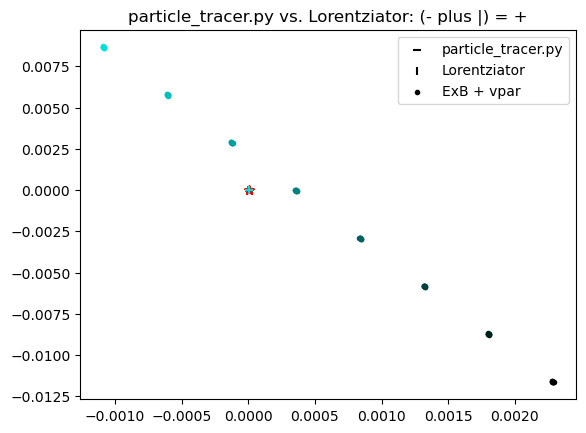

In [12]:


for i in range(nv):
    for j in range(nv):
        dx_ExB_plot = v_ExB * (end_ti - start_ti) * dt
        dx_vpar_i_plot = vpar_i[i, j, :] * (end_ti - start_ti) * dt
        dx_plot = dx_ExB_plot + dx_vpar_i_plot
        x_f = x[i,j,inds[0],:] + dx_plot

        plt.scatter(x[i,j,start_ti,0]/R_E, x[i,j,start_ti,2]/R_E, color = "red", marker = '*')  # x-z
        if (i+j) == 0:
            plt.scatter(x[i,j,end_ti,0]/R_E, x[i,j,end_ti,2]/R_E, color = (0, i/nv, i/nv), marker = "_", label = 'particle_tracer.py')  # x-z
            plt.scatter(xl[i,j,end_ti,0]/R_E, xl[i,j,end_ti,2]/R_E, color = (0, i/nv, i/nv), marker = "|", label = 'Lorentziator')  # x-z
            plt.scatter(x_f[0]/R_E, x_f[2]/R_E, color = (0, i/nv, i/nv), marker = ".", label = 'ExB + vpar')  # x-z
        else:
            plt.scatter(x[i,j,end_ti,0]/R_E, x[i,j,end_ti,2]/R_E, color = (0, i/nv, i/nv), marker = "_")  # x-z
            plt.scatter(xl[i,j,end_ti,0]/R_E, xl[i,j,end_ti,2]/R_E, color = (0, i/nv, i/nv), marker = "|")  # x-z
            plt.scatter(x_f[0]/R_E, x_f[2]/R_E, color = (0, i/nv, i/nv), marker = ".")  # x-z
        plt.legend()
        plt.title('particle_tracer.py vs. Lorentziator: (- plus |) = +')
        #plt.plot(x[i,j,:,0]/R_E, x[i,j,:,2]/R_E, color = (0, i/nv, j/nv))  # x-z

In [13]:
dct.keys()


dict_keys(['run', 'fileIndex', 'f', 'vpar', 'vperp', 'x_i', 'v_i', 'x_f', 'v_f', 'x', 'v', 't', 'filename'])

In [14]:
dct['t'][1][1]

array([0.00000e+00, 5.00000e-04, 1.00000e-03, ..., 5.99990e+01,
       5.99995e+01, 6.00000e+01])

In [15]:
print(x[0,0,0,2], v[0,0,0,2])  # z[RE], vz[m/s], t=1300s
print(x[0,0,99,2], v[0,0,99,2])    # z[RE], vz[m/s], t=1300s-t_out*100

print(xl[0,0,0,2], vl[0,0,0,2])  # "" for lorentziator 
print(xl[0,0,1,2], vl[0,0,1,2])

0.0 4901342.209112112
-0.038591852769818365 4884843.393451701
0.0 5101702.417359325
-0.03898336977197075 5109868.741338089


In [16]:
xl.shape

(8, 8, 31, 3)